# Seaborn 패키지를 사용한 데이터 시각화

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Histogram

## 히스토그램 기본형

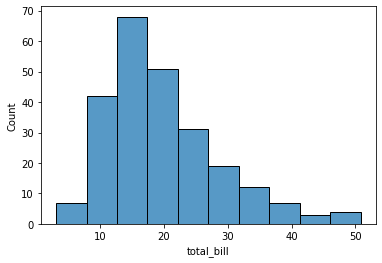

In [3]:
sns.histplot(data = tips, x = 'total_bill', bins = 10)
plt.show()

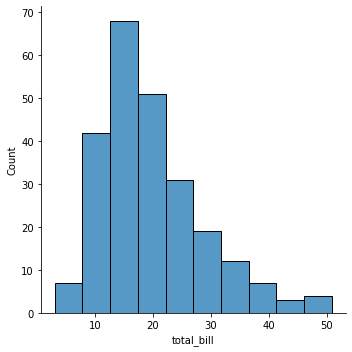

In [5]:
sns.displot(data = tips, x = 'total_bill', kind = 'hist', bins = 10)
plt.show()

## 밀도곡선과 밀도 히스토그램으로 나타내기

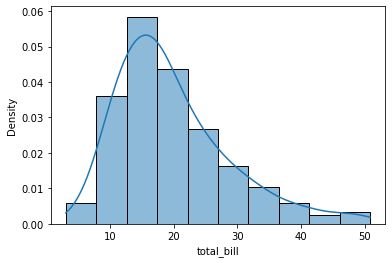

In [4]:
sns.histplot(data = tips, x = 'total_bill', stat = 'density', bins = 10, kde = True)
plt.show()

# Boxplot

## 박스플롯 기본형

### 가로 박스플롯

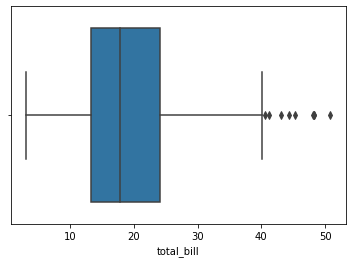

In [6]:
sns.boxplot(data = tips, x = 'total_bill')
plt.show()

### 세로 박스플롯

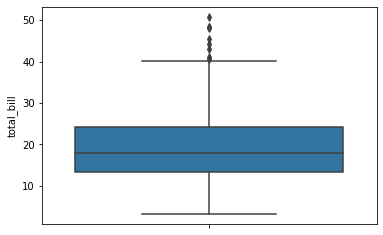

In [9]:
sns.boxplot(data = tips, y = 'total_bill')
plt.show()

## 그룹별 박스플롯 그리기

### 성별 tip 기술통계량 비교

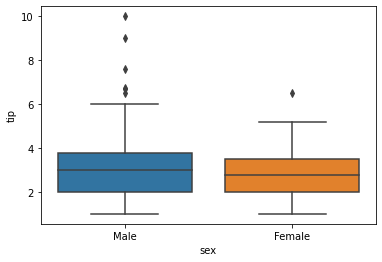

In [10]:
# 성별 tip의 기술통계량 요약
sns.boxplot(data = tips, x = 'sex', y = 'tip')
plt.show()

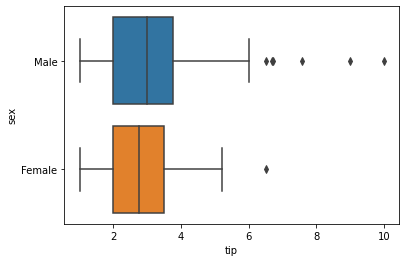

In [11]:
sns.boxplot(data = tips, x = 'tip', y = 'sex')
plt.show()

### 요일별 tip 분포(기술통계량) 비교

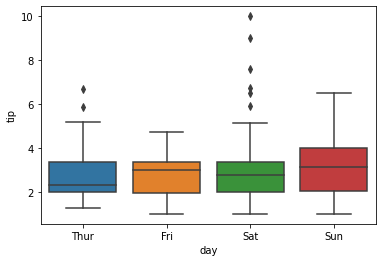

In [12]:
sns.boxplot(data = tips, x = 'day', y = 'tip')
plt.show()

# Scatter plot

## 산점도 기본형

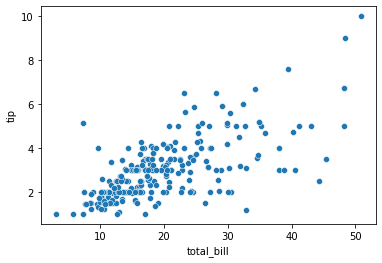

In [13]:
# tip-total bill 사이의 산점도 그리기
sns.scatterplot(data = tips, x = 'total_bill', y = 'tip')
plt.show()

## 산점도 + 선형회귀 직선
* **`seaborn.regplot()` 함수를 사용함**

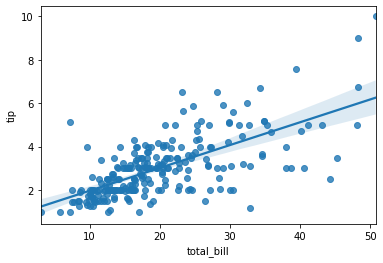

In [14]:
sns.regplot(data = tips, x = 'total_bill', y = 'tip')
plt.show()

## 산점도 + marginal histogram
* **`seaborn.jointplot()` 함수를 사용함**

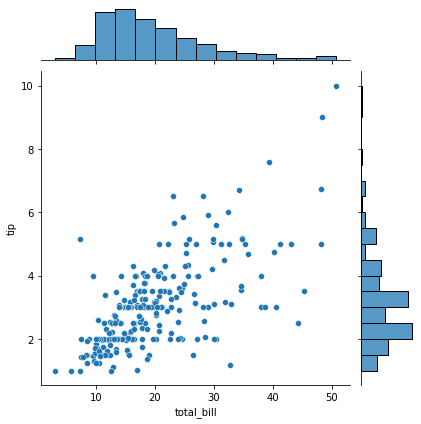

In [15]:
sns.jointplot(data = tips, x = 'total_bill', y = 'tip')
plt.show()

## 그룹에 따라 다른 색의 점으로 나타내기

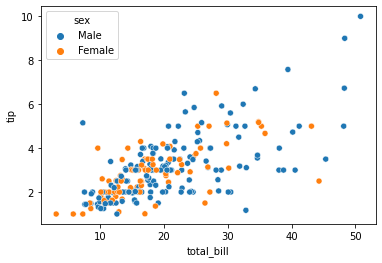

In [16]:
# 점의 색깔을 tip - total bill scatter plot에서 성별에 따라 달리 나타내기
sns.scatterplot(data = tips, x = 'total_bill', y = 'tip', hue = 'sex')
plt.show()

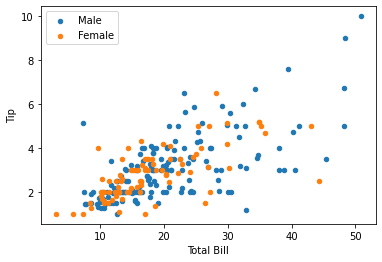

In [17]:
# 비교 : matplotlib.pyplot으로 위와 동일한 과정을 수행할 경우
# 자유도는 높지만, 정말로 복잡한 과정을 거치게 될 것이다.

tips_male = tips[tips['sex'] == 'Male']
tips_female = tips[tips['sex'] == 'Female']

plt.scatter(x = tips_male['total_bill'],
           y = tips_male['tip'],
           label = 'Male',
           s = 20)
plt.scatter(x = tips_female['total_bill'],
           y = tips_female['tip'],
           label = 'Female',
           s = 20)

plt.legend()
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

## 그룹에 따라 점의 크기를 다르게 나타내기

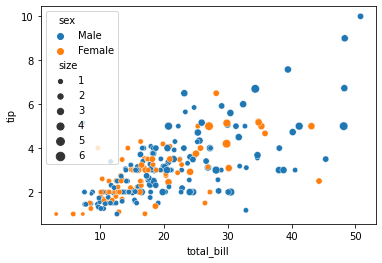

In [18]:
# tips- total_bill scatter plot
# 점의 색깔은 성별에 따라서, 점의 크기는 인원수(size)에 따라 다르게 나타내기
sns.scatterplot(data = tips, x = 'total_bill', y = 'tip', hue = 'sex', size = 'size')
plt.show()

## 그룹에 따라 점의 모양을 다르게 나타내기

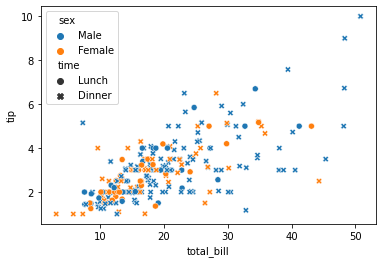

In [19]:
# tip - total_bill scatter plot
# 점의 색은 성별에 따라서, marker의 종류는 시간(time)에 따라서 다르게 표현하기
sns.scatterplot(data = tips, x = 'total_bill', y = 'tip', hue = 'sex', style = 'time')
plt.show()

# Bar Plot

## countplot()
* 카테고리 타입 변수들의 빈도수(count)를 막대로 표현한 그래프

### countplot 기본형

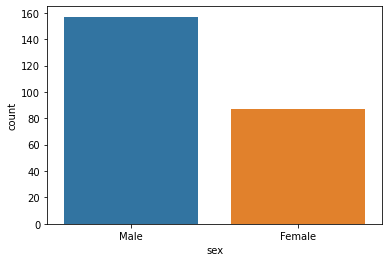

In [21]:
# tips 데이터셋에서 성별 비교
sns.countplot(data = tips, x = 'sex')
plt.show()

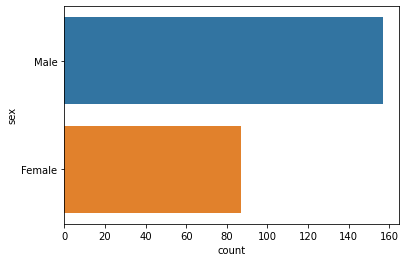

In [22]:
sns.countplot(data = tips, y = 'sex')
plt.show()

### countplot을 그룹별 dodge하여 나타내기

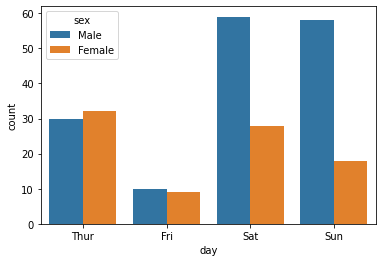

In [23]:
# 요일별 빈도수 막대그래프
# 성별에 따라 색깔을 다르게 표현하기
sns.countplot(data = tips, x = 'day', hue = 'sex', dodge = True)
plt.show()

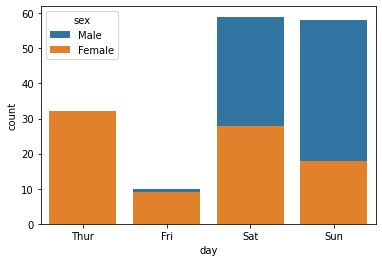

In [25]:
# 만약 dodge를 하지 않을 경우의 결과물은 다음과 같다.
sns.countplot(data = tips, x = 'day', hue = 'sex', dodge = False)
plt.show()

## barplot()
* 그룹별 변수(컬럼)의 요약통계량(ex. 평균)

### barplot 기본형

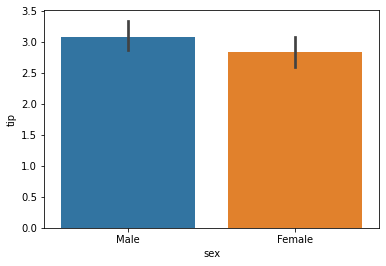

In [26]:
sns.barplot(data = tips, x = 'sex', y = 'tip')
plt.show()

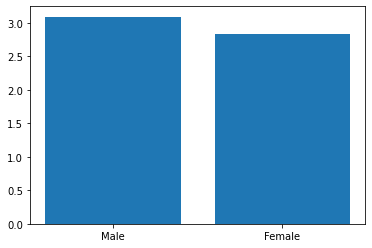

In [27]:
# 만약 이 과정을 matplotlib.pyplot으로만 그리게 될 경우 상당히 복잡하게 된다.

male_tip = tips[tips['sex'] == 'Male']['tip'].mean()
female_tip = tips[tips['sex'] == 'Female']['tip'].mean()

import pandas as pd

tip_by_gender = pd.Series(data = [male_tip, female_tip],
                          index = ['Male', 'Female'])

plt.bar(x = tip_by_gender.index, height = tip_by_gender.values)
plt.show()

### 그룹별 barplot, 가로막대

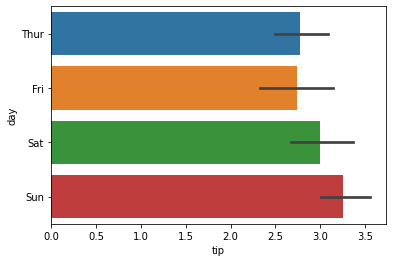

In [28]:
sns.barplot(data = tips, x = 'tip', y = 'day')
plt.show()

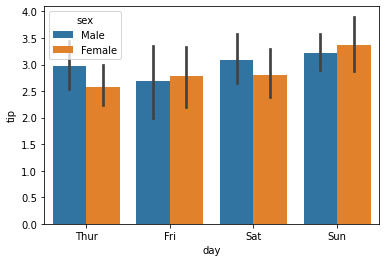

In [29]:
# 요일별, 성별 tip의 평균을 나타내는 세로막대 그래프(막대 색깔 : 성별)
sns.barplot(data = tips, x = 'day', y = 'tip', hue = 'sex')
plt.show()

# Line Plot

In [30]:
import numpy as np

In [31]:
x_data = np.arange(10)
y_data = np.random.rand(10)

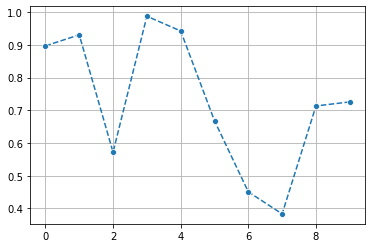

In [32]:
sns.lineplot(x = x_data, y = y_data, marker = 'o', linestyle = '--')
plt.grid()
plt.show()

# Category Plot
* **`seaborn.catplot()` 함수**

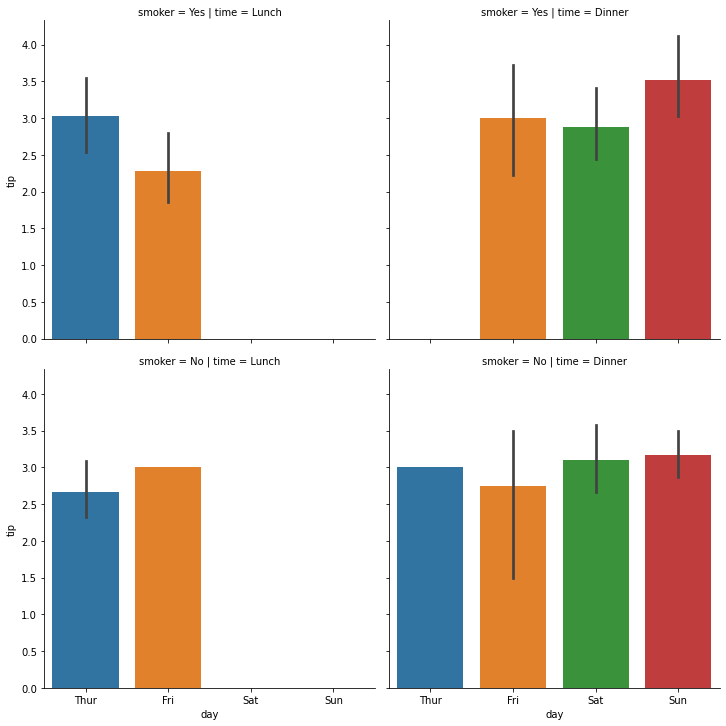

In [33]:
# 요일별(x축) tip 평균(y축) 막대그래프
# 흡연여부별(row)로 subplot 생성, 시간별(column)로 subplot 생성
sns.catplot(data = tips, x = 'day', y = 'tip', kind = 'bar',
            row = 'smoker', col = 'time')
plt.show()